In [21]:
# TASK 1
# Explore Data
# a - show key descriptive stats
# b - create visual reps
# c - state obs from descriptive and visual stats

ad <- read.csv("Advertising.csv")
head(ad)

ad$X <- NULL # remove var X as it provides no useful info

,X,TV,radio,newspaper,sales
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,230.1,37.8,69.2,22.1
2,2,44.5,39.3,45.1,10.4
3,3,17.2,45.9,69.3,9.3
4,4,151.5,41.3,58.5,18.5
5,5,180.8,10.8,58.4,12.9
6,6,8.7,48.9,75.0,7.2


In [22]:
# Univar data exploration
# descriptive stats
summary(ad) # note that our target var is sales

       TV             radio          newspaper          sales      
 Min.   :  0.70   Min.   : 0.000   Min.   :  0.30   Min.   : 1.60  
 1st Qu.: 74.38   1st Qu.: 9.975   1st Qu.: 12.75   1st Qu.:10.38  
 Median :149.75   Median :22.900   Median : 25.75   Median :12.90  
 Mean   :147.04   Mean   :23.264   Mean   : 30.55   Mean   :14.02  
 3rd Qu.:218.82   3rd Qu.:36.525   3rd Qu.: 45.10   3rd Qu.:17.40  
 Max.   :296.40   Max.   :49.600   Max.   :114.00   Max.   :27.00  

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


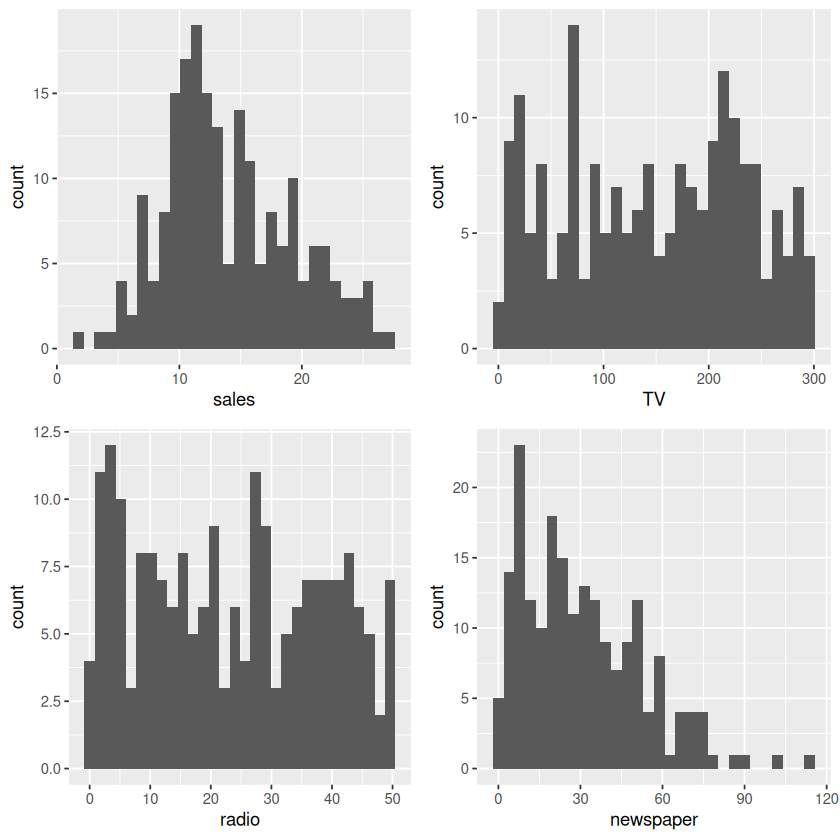

In [23]:
# Univar data exploration
# visual rep
library(ggplot2)
library(gridExtra)
p1 <- ggplot(ad, aes(x = sales)) + geom_histogram()
p2 <- ggplot(ad, aes(x = TV)) + geom_histogram()
p3 <- ggplot(ad, aes(x = radio)) + geom_histogram()
p4 <- ggplot(ad, aes(x = newspaper)) + geom_histogram()
grid.arrange(p1, p2, p3, p4, nrow = 2)

In [24]:
cor(ad)
# last row (or col) of this matrix is of most
# interest since sales is the target var

,TV,radio,newspaper,sales
TV,1.00000000,0.05480866,0.05664787,0.7822244
radio,0.05480866,1.00000000,0.35410375,0.5762226
newspaper,0.05664787,0.35410375,1.00000000,0.2282990
sales,0.78222442,0.57622257,0.22829903,1.0000000


`geom_smooth()` using formula = 'y ~ x'


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


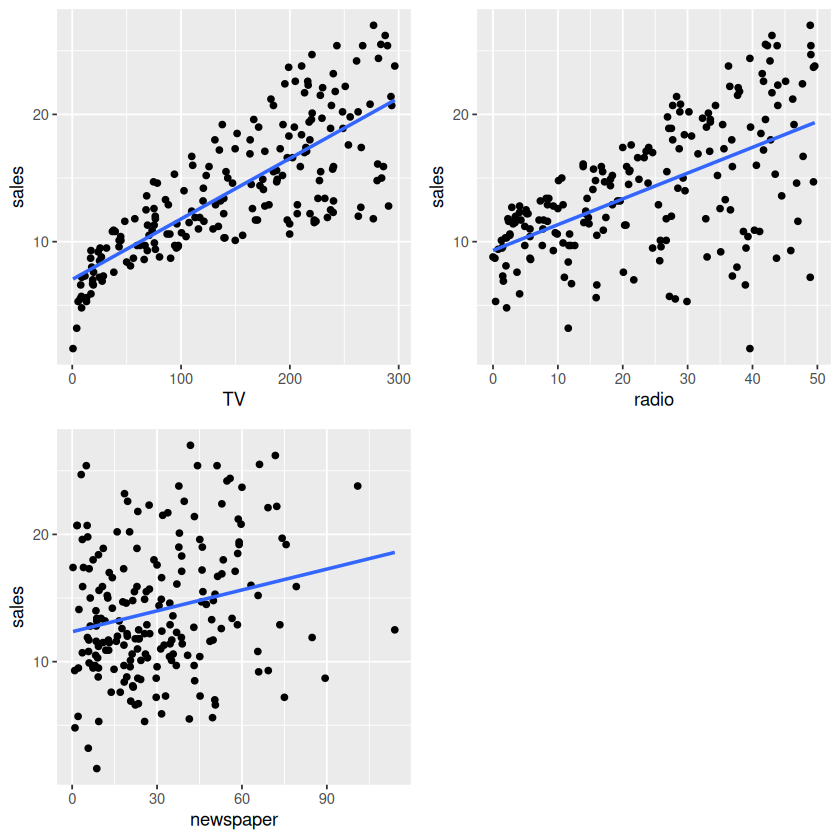

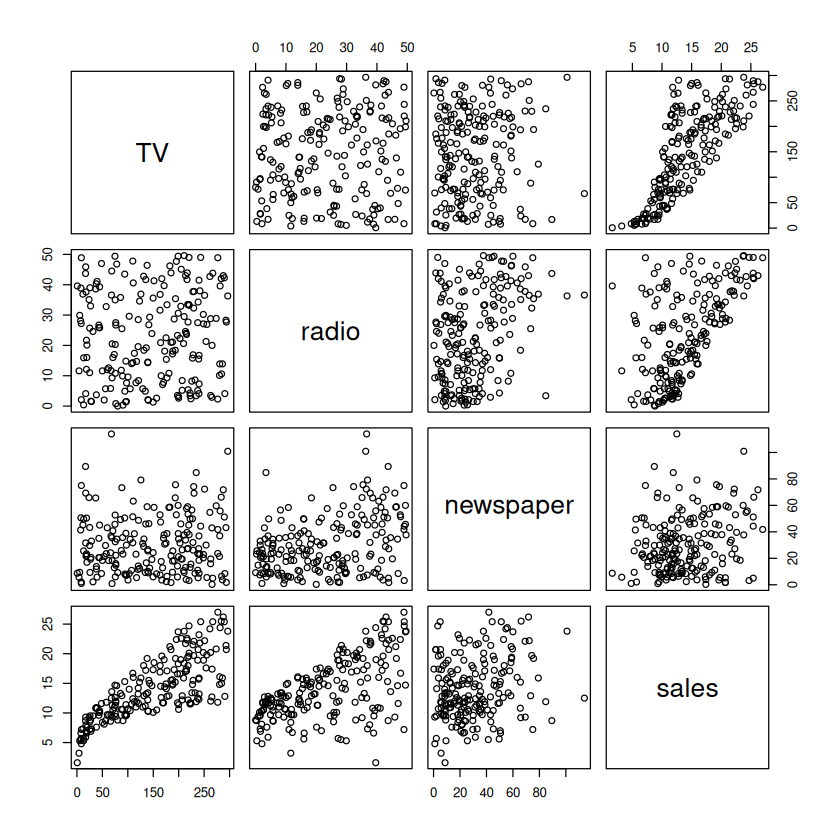

In [25]:
# Set up scatterplots
p1 <- ggplot(ad, aes(x = TV, y = sales)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE)
p2 <- ggplot(ad, aes(x = radio, y = sales)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE)
p3 <- ggplot(ad, aes(x = newspaper, y = sales)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE)

grid.arrange(p1, p2, p3, ncol = 2)

# note taht sales has a positive rel with TV and radio
# sales and newspaper is less clear
# note we can alternatively use the pairs fnc to
# make a scatterplot matrix
pairs(ad)

In [26]:
# Task 2
# Construct SLR models
# a - fit 3 separate SLR and run summary on each
# b - use sales on TV and do the following:
# b_i - interpret estimated coef for TV
# b_ii - comment on stat significance for TV
# b_iii - comment on goodness of fit and interpret
#   value of coefficient of determination
# b_iv - pred value of sales when TV = 0, 100, 200, 300
# c - if only one adv media can be used, make a rec

slr.TV <- lm(sales ~ TV, data = ad)
slr.TV


Call:
lm(formula = sales ~ TV, data = ad)

Coefficients:
(Intercept)           TV  
    7.03259      0.04754  


In [27]:
summary(slr.TV)


Call:
lm(formula = sales ~ TV, data = ad)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3860 -1.9545 -0.1913  2.0671  7.2124 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.032594   0.457843   15.36   <2e-16 ***
TV          0.047537   0.002691   17.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.259 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16
